# Data Analysis on Ethereum Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
sc

In [4]:
from pyspark.sql import HiveContext

In [5]:
hive_context = HiveContext(sc)

In [6]:
eth_data = hive_context.table("cryptocurrency.ether_data_mod")

In [7]:
eth_data.show()

+----------+------+-----------+--------------+-------------+-----------+--------------------+--------------+-------------------+--------------+----------+-------------+-------------+-------------+
|      date|eth_tx|eth_address|eth_etherprice|eth_marketcap| eth_supply|eth_network_hashrate|eth_difficulty|eth_transaction_fee|eth_blockcount|eth_uncles|eth_blocksize| eth_gasprice|eth_blocktime|
+----------+------+-----------+--------------+-------------+-----------+--------------------+--------------+-------------------+--------------+----------+-------------+-------------+-------------+
|2015-07-30|8893.0|     9205.0|           0.0|          0.0|7.2049304E7|             11.5297|         0.121|                0.0|        6912.0|    1299.0|        644.0|          0.0|         4.46|
|2015-07-31|   0.0|     9361.0|           0.0|          0.0|7.2085496E7|             51.4594|         0.603|                0.0|        6863.0|     511.0|        582.0|          0.0|        12.58|
|2015-08-01|   

In [8]:
#Checking for nulls

from pyspark.sql.functions import col,count,isnan,lit
from pyspark.sql import functions as F

drop_list = ['date']
eth_temp = eth_data.select([column for column in eth_data.columns if column not in drop_list])

eth_temp.select([count(F.when(isnan(c), c)).alias(c) for c in eth_temp.columns]).show()

+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+
|eth_tx|eth_address|eth_etherprice|eth_marketcap|eth_supply|eth_network_hashrate|eth_difficulty|eth_transaction_fee|eth_blockcount|eth_uncles|eth_blocksize|eth_gasprice|eth_blocktime|
+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+
|     0|          0|             0|            0|         0|                   0|             0|                  0|             0|         0|            0|           0|            0|
+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+



In [9]:
eth_data.count()

986

In [10]:
eth_data.printSchema()

root
 |-- date: date (nullable = true)
 |-- eth_tx: float (nullable = true)
 |-- eth_address: float (nullable = true)
 |-- eth_etherprice: float (nullable = true)
 |-- eth_marketcap: float (nullable = true)
 |-- eth_supply: float (nullable = true)
 |-- eth_network_hashrate: float (nullable = true)
 |-- eth_difficulty: float (nullable = true)
 |-- eth_transaction_fee: float (nullable = true)
 |-- eth_blockcount: float (nullable = true)
 |-- eth_uncles: float (nullable = true)
 |-- eth_blocksize: float (nullable = true)
 |-- eth_gasprice: float (nullable = true)
 |-- eth_blocktime: float (nullable = true)



### Data Preprocessing

In [11]:
import matplotlib

In [12]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

In [14]:
#Converting to Pandas data frame
eth_pdf = eth_data.toPandas()
eth_pdf.head(10)

,date,eth_tx,eth_address,eth_etherprice,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime
0,2015-07-30,8893.0,9205.0,0.0,0.000000,72049304.0,11.529700,0.121,0.000000e+00,6912.0,1299.0,644.0,0.000000e+00,4.460000
1,2015-07-31,0.0,9361.0,0.0,0.000000,72085496.0,51.459400,0.603,0.000000e+00,6863.0,511.0,582.0,0.000000e+00,12.580000
2,2015-08-01,0.0,9476.0,0.0,0.000000,72113208.0,57.784500,0.887,0.000000e+00,5293.0,334.0,575.0,0.000000e+00,16.340000
3,2015-08-02,0.0,9563.0,0.0,0.000000,72141424.0,67.922401,1.020,0.000000e+00,5358.0,394.0,581.0,0.000000e+00,16.120001
4,2015-08-03,0.0,9639.0,0.0,0.000000,72169408.0,74.573700,1.126,0.000000e+00,5280.0,443.0,587.0,0.000000e+00,16.370001
5,2015-08-04,0.0,9696.0,0.0,0.000000,72197880.0,82.035202,1.217,0.000000e+00,5368.0,458.0,587.0,0.000000e+00,16.100000
6,2015-08-05,0.0,9749.0,0.0,0.000000,72225408.0,86.155800,1.328,0.000000e+00,5235.0,371.0,579.0,0.000000e+00,16.510000
7,2015-08-06,0.0,9790.0,0.0,0.000000,72252488.0,88.332603,1.381,0.000000e+00,5116.0,411.0,584.0,0.000000e+00,16.889999
8,2015-08-07,2050.0,10314.0,3.0,216.839767,72279928.0,95.298103,1.471,3.730000e+19,5189.0,409.0,633.0,6.050000e+11,16.650000
9,2015-08-08,2881.0,10730.0,1.2,86.769440,72307872.0,104.897102,1.586,6.810000e+19,5256.0,458.0,668.0,3.230000e+11,16.440001


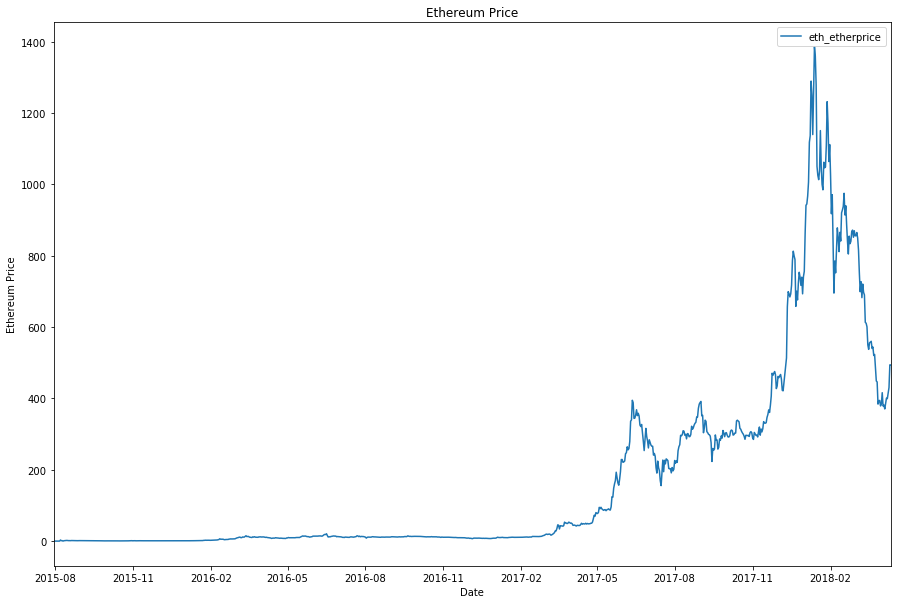

In [15]:
#Plots for different attributes
#Ethereum Price

df = pd.concat([eth_pdf['date'],eth_pdf['eth_etherprice']],axis=1)
ax = df.plot(x="date", y="eth_etherprice", kind='line',title='Ethereum Price',figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Ethereum Price")
plt.show()

In [16]:
eth_preds = eth_pdf.iloc[8:,[1,2,4,5,6,7,8,9,10,11,12,13]]

In [20]:
eth_preds.head(5)

,eth_tx,eth_address,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime
8,2050.0,10314.0,216.839767,72279928.0,95.298103,1.471,3.730000e+19,5189.0,409.0,633.0,6.050000e+11,16.650000
9,2881.0,10730.0,86.769440,72307872.0,104.897102,1.586,6.810000e+19,5256.0,458.0,668.0,3.230000e+11,16.440001
10,1329.0,11004.0,86.802055,72335048.0,109.691597,1.709,1.410000e+19,5123.0,421.0,618.0,4.750000e+11,16.860001
11,2037.0,11679.0,0.000000,72362864.0,120.598801,1.838,3.120000e+19,5255.0,415.0,631.0,4.220000e+11,16.440001
12,4963.0,13576.0,71.666985,72390888.0,134.769501,2.036,1.130000e+19,5280.0,438.0,692.0,7.783882e+10,16.370001


8     3.00
9     1.20
10    1.20
11    0.00
12    0.99
Name: eth_etherprice, dtype: float64

[1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1

(array([ 471.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  507.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

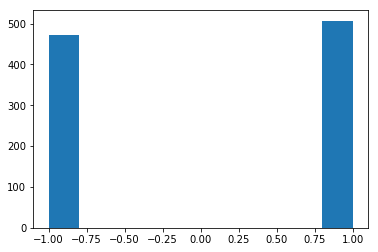

In [18]:
eth_tgt = eth_pdf.iloc[8:,3]
eth_tgt.head(5)

#creating target labels
eth_diff=[]
eth_diff.append(1)
for i in xrange(1,len(eth_tgt)):
    v = eth_tgt.iloc[i] - eth_tgt.iloc[i-1]
    if v < 0:
        eth_diff.append(-1)
    else:
        eth_diff.append(1)

print(eth_diff)
print(len(eth_diff))

plt.hist(eth_diff)
plt.show()

In [19]:
#Consolidating dataset and target
eth_preds = eth_preds.reset_index(drop=True)
eth_target = pd.DataFrame({'eth_target':eth_diff})
eth_target.shape
eth_preds.shape

eth_dat = pd.concat([eth_preds,eth_target],axis=1)
eth_dat.head(5)

(978, 1)

(978, 12)

,eth_tx,eth_address,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime,eth_target
0,2050.0,10314.0,216.839767,72279928.0,95.298103,1.471,3.730000e+19,5189.0,409.0,633.0,6.050000e+11,16.650000,1
1,2881.0,10730.0,86.769440,72307872.0,104.897102,1.586,6.810000e+19,5256.0,458.0,668.0,3.230000e+11,16.440001,-1
2,1329.0,11004.0,86.802055,72335048.0,109.691597,1.709,1.410000e+19,5123.0,421.0,618.0,4.750000e+11,16.860001,1
3,2037.0,11679.0,0.000000,72362864.0,120.598801,1.838,3.120000e+19,5255.0,415.0,631.0,4.220000e+11,16.440001,-1
4,4963.0,13576.0,71.666985,72390888.0,134.769501,2.036,1.130000e+19,5280.0,438.0,692.0,7.783882e+10,16.370001,1


In [20]:
#Summary

eth_dat.describe()

,eth_tx,eth_address,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime,eth_target
count,9.780000e+02,9.780000e+02,978.000000,9.780000e+02,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000
mean,2.040522e+05,4.870899e+06,16255.554189,8.625866e+07,49175.565606,708.782674,2.340374e+20,5494.016360,547.293456,6775.725971,3.645941e+10,15.938916,0.036810
std,2.880209e+05,8.258847e+06,26943.766324,8.088158e+06,74883.134576,1023.612761,4.352158e+20,760.089032,339.492877,8416.602570,4.993240e+10,3.126918,0.999834
min,1.329000e+03,1.031400e+04,0.000000,7.227993e+07,95.298103,1.471000,5.510000e+18,2829.000000,126.000000,618.000000,1.037198e+10,13.430000,-1.000000
25%,3.290350e+04,1.498455e+05,690.267380,7.886816e+07,1921.531403,25.803249,2.875000e+19,5056.750000,354.250000,1382.000000,2.245118e+10,14.140000,-1.000000
50%,4.731450e+04,8.802195e+05,1029.505737,8.671953e+07,6594.095459,84.302998,4.470000e+19,5889.500000,425.000000,1678.500000,2.379369e+10,14.460000,1.000000
75%,2.926250e+05,5.396476e+06,27616.539551,9.388635e+07,83408.861328,1423.416779,3.050000e+20,6035.000000,531.750000,11810.250000,4.340921e+10,16.840000,1.000000
max,1.349890e+06,3.101023e+07,134210.781250,9.874162e+07,270957.875000,3333.440918,3.700000e+21,6409.000000,2096.000000,33681.000000,9.400000e+11,30.309999,1.000000


In [21]:
#Importing the required packages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

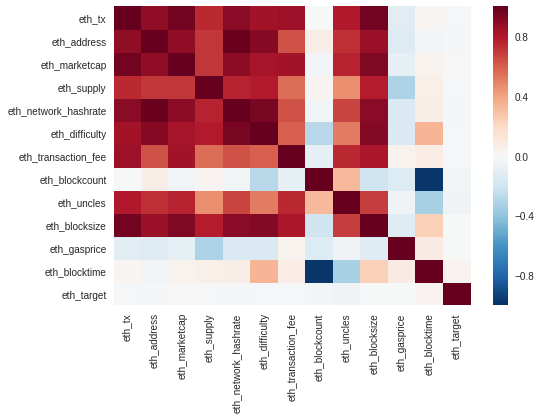

In [22]:
#Checking correlation
corr_mat = eth_dat.corr()

#Heatmap
sns.heatmap(corr_mat)

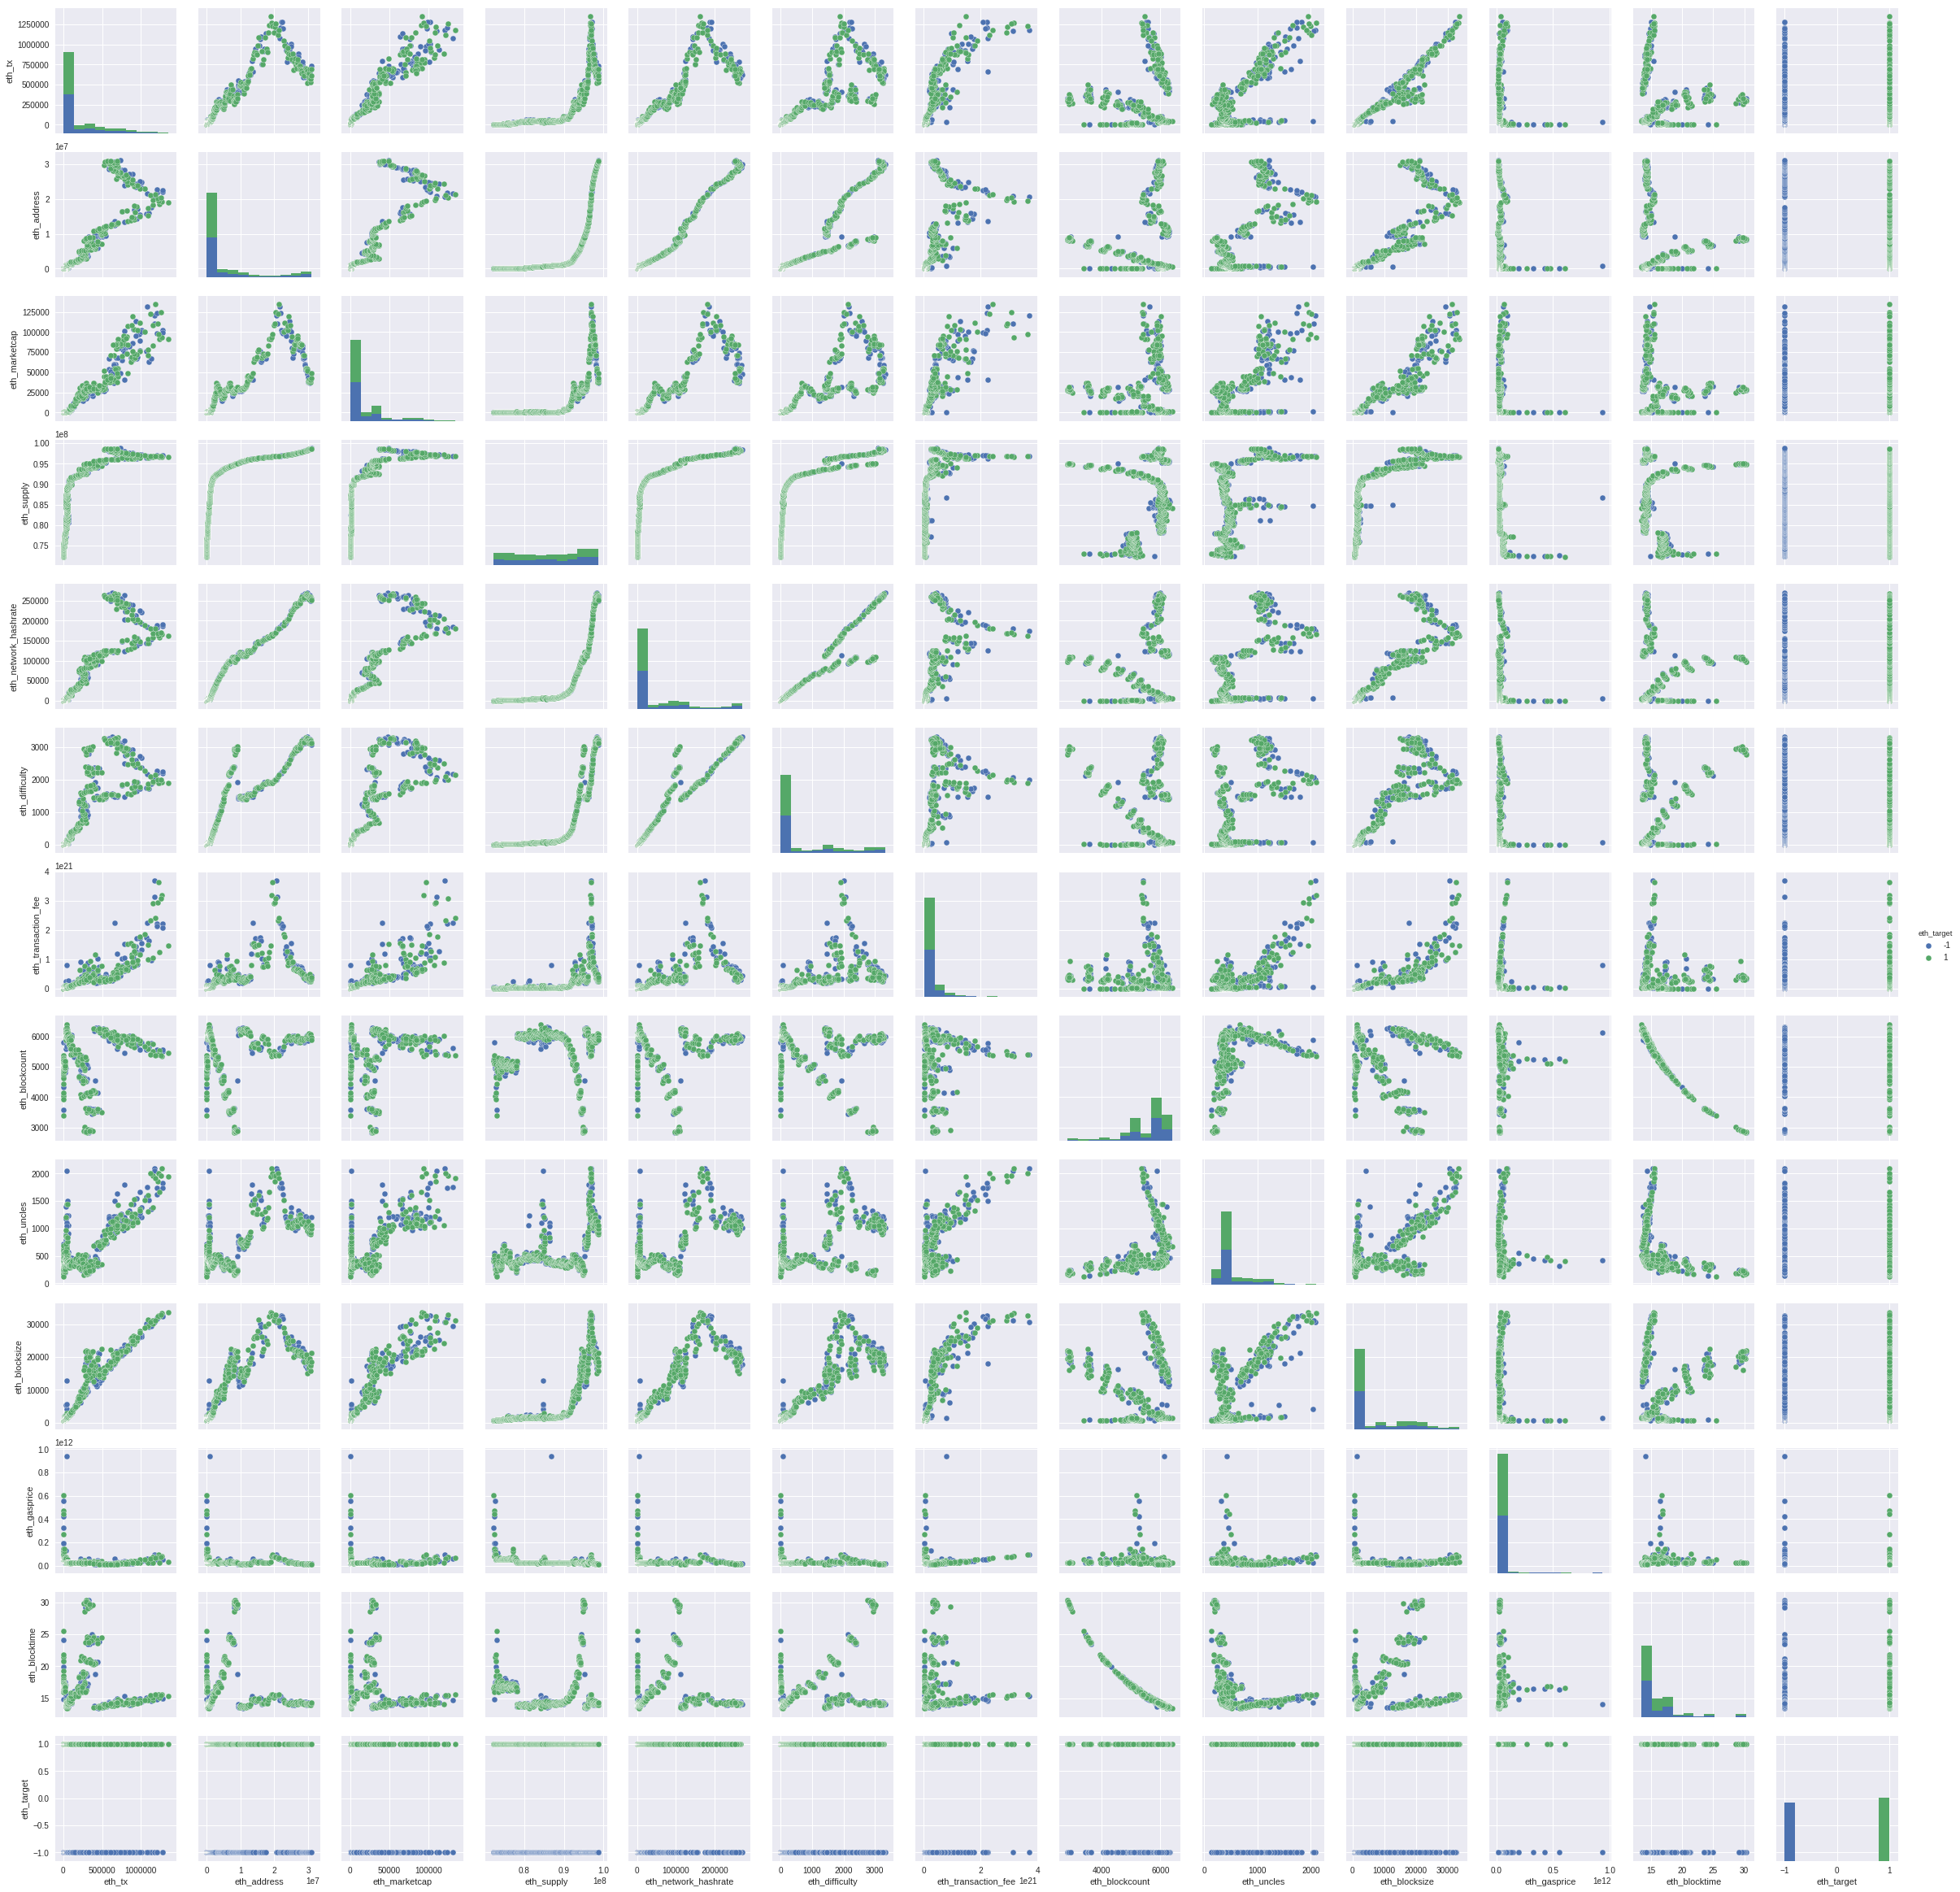

In [23]:
#Pairplots
var_plot = sns.pairplot(data = eth_dat, hue = "eth_target", kind='scatter')
plt.show()

In [24]:
#Dividing into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(
          eth_preds, eth_diff, test_size=0.25, random_state=42)

In [25]:
x_train.head(5)
x_test.head(5)
y_train = pd.DataFrame({'y_train':y_train})
y_test = pd.DataFrame({'y_test':y_test})

y_train.head(5)
y_test.head(5)

,eth_tx,eth_address,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime
477,40804.0,843172.0,806.502136,86349272.0,5364.807617,69.016998,7.260000e+19,5938.0,778.0,1501.0,2.464180e+10,14.56
359,48749.0,501305.0,978.863770,82534888.0,4120.242188,54.483002,3.040000e+19,6029.0,505.0,1585.0,2.255149e+10,14.33
634,110354.0,1678680.0,7049.687500,91258096.0,23246.738281,335.200012,1.130000e+20,5619.0,373.0,3461.0,2.297546e+10,15.29
633,112202.0,1663543.0,7072.958008,91228656.0,23205.279297,336.173004,1.060000e+20,5624.0,340.0,3544.0,2.298965e+10,15.32
465,45330.0,801577.0,878.543457,85963160.0,5155.462891,69.610001,3.700000e+19,6006.0,393.0,1577.0,2.458613e+10,14.33


,eth_tx,eth_address,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime
199,18190.0,76417.0,434.283020,77550536.0,844.599121,13.432000,3.250000e+19,5103.0,330.0,1090.0,5.957798e+10,16.680000
543,43649.0,1024108.0,947.201782,88440872.0,8339.120117,112.737000,3.200000e+19,6018.0,373.0,1539.0,2.301069e+10,14.290000
174,16765.0,51643.0,196.070023,76890208.0,652.199097,10.449000,4.140000e+19,5059.0,334.0,1424.0,5.618026e+10,16.959999
928,733084.0,27328384.0,83540.093750,97742008.0,245866.671875,2967.711914,6.260000e+20,5926.0,1232.0,20793.0,1.883374e+10,14.250000
66,6593.0,24473.0,46.609200,73982856.0,386.338593,6.145000,1.070000e+19,5148.0,284.0,787.0,5.135990e+10,16.480000


,y_train
0,-1
1,-1
2,-1
3,-1
4,1


,y_test
0,1
1,1
2,1
3,1
4,1


In [38]:
#Scaling datasets

from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(x_train)
train_scaler

x_trains = pd.DataFrame(data = train_scaler.transform(x_train))
x_trains.shape
x_trains.describe()
x_trains.head(10)

x_tests = pd.DataFrame(data = train_scaler.transform(x_test))
x_tests.shape
x_tests.describe()
x_tests.head(10)

StandardScaler(copy=True, with_mean=True, with_std=True)

(733, 12)

,0,1,2,3,4,5,6,7,8,9,10,11
count,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02
mean,-1.060240e-17,4.665057e-17,-5.452664e-17,5.907053e-16,-1.257142e-17,-4.831666e-17,-6.058516e-18,-1.697899e-16,2.419620e-17,9.617894e-17,-5.354213e-17,-6.361442e-17
std,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00,1.000683e+00
min,-6.982292e-01,-5.871894e-01,-6.020789e-01,-1.738041e+00,-6.524422e-01,-6.862122e-01,-5.250234e-01,-3.572647e+00,-1.266795e+00,-7.247748e-01,-5.048717e-01,-8.027864e-01
25%,-5.910908e-01,-5.705213e-01,-5.763870e-01,-9.315382e-01,-6.281994e-01,-6.627223e-01,-4.706459e-01,-5.852482e-01,-5.640976e-01,-6.346116e-01,-2.752322e-01,-5.733844e-01
50%,-5.396532e-01,-4.805667e-01,-5.637661e-01,5.539038e-02,-5.664734e-01,-6.049585e-01,-4.319556e-01,5.116454e-01,-3.568919e-01,-5.989546e-01,-2.487352e-01,-4.717923e-01
75%,2.890272e-01,5.039082e-02,4.139438e-01,9.384609e-01,4.352954e-01,7.158918e-01,1.608270e-01,7.133883e-01,-4.458178e-02,4.882855e-01,1.036633e-01,3.048976e-01
max,3.768220e+00,3.216114e+00,4.333813e+00,1.552216e+00,2.997338e+00,2.605801e+00,8.138069e+00,1.201045e+00,4.649078e+00,3.211308e+00,1.725999e+01,4.715972e+00


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562430,-0.485008,-0.571867,0.011347,-0.581437,-0.619476,-0.367706,0.571767,0.691149,-0.620325,-0.233340,-0.432466
1,-0.534598,-0.526951,-0.565411,-0.462935,-0.598207,-0.633836,-0.466660,0.693348,-0.128665,-0.610240,-0.273288,-0.507841
2,-0.318798,-0.382502,-0.337998,0.621712,-0.340485,-0.356485,-0.272974,0.145569,-0.525059,-0.385012,-0.265185,-0.193232
3,-0.312324,-0.384359,-0.337126,0.618052,-0.341043,-0.355524,-0.289388,0.152249,-0.624157,-0.375047,-0.264914,-0.183401
4,-0.546575,-0.490111,-0.569169,-0.036662,-0.584258,-0.618890,-0.451184,0.662619,-0.464999,-0.611200,-0.234404,-0.507841
5,-0.553679,-0.465866,-0.566063,0.232274,-0.545335,-0.580607,-0.465956,0.716060,-0.540074,-0.619965,-0.276075,-0.527504
6,-0.566465,-0.472434,-0.574767,0.157585,-0.573149,-0.608041,-0.472053,0.732093,-0.585118,-0.625487,-0.264912,-0.547167
7,-0.592439,-0.569732,-0.576052,-0.908086,-0.626288,-0.660906,-0.492453,0.741445,-0.350886,-0.646737,-0.251753,-0.674977
8,-0.682588,-0.584074,-0.599763,-1.351661,-0.647234,-0.679941,-0.511212,-0.916588,-0.140677,-0.702204,0.319864,0.649001
9,-0.556457,-0.463348,-0.567417,0.263543,-0.544431,-0.578316,-0.466191,0.601160,-0.528062,-0.617684,-0.276305,-0.475069


(245, 12)

,0,1,2,3,4,5,6,7,8,9,10,11
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.037620,0.036500,0.027358,0.000319,0.035517,0.050367,0.043284,-0.085485,-0.006622,0.051675,-0.029918,0.077556
std,1.034774,1.051604,1.036513,1.022573,1.035203,1.043743,1.079182,1.058159,1.075906,1.040347,0.800850,1.093658
min,-0.700709,-0.587105,-0.600911,-1.731187,-0.652248,-0.685977,-0.524742,-3.581999,-1.131661,-0.726336,-0.506049,-0.737243
25%,-0.586103,-0.568046,-0.575280,-0.857148,-0.622984,-0.657429,-0.469942,-0.646706,-0.606139,-0.634612,-0.274673,-0.570107
50%,-0.539594,-0.479181,-0.563136,0.075105,-0.561329,-0.600958,-0.440866,0.484924,-0.398934,-0.599435,-0.250621,-0.429189
75%,0.404334,0.139598,0.456118,0.971154,0.593150,0.725970,0.200690,0.678651,-0.083621,0.864786,0.259703,0.334392
max,4.023261,3.206296,4.425451,1.549651,2.945496,2.557294,6.707699,1.052744,4.258691,3.243123,8.373417,4.729080


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.641646,-0.579079,-0.585811,-1.082691,-0.642346,-0.674395,-0.461735,-0.543831,-0.654187,-0.669668,0.434322,0.262295
1,-0.552464,-0.462810,-0.566597,0.271417,-0.541360,-0.576281,-0.462908,0.678651,-0.525059,-0.615763,-0.264512,-0.520950
2,-0.646637,-0.582119,-0.594734,-1.164797,-0.644938,-0.677342,-0.440866,-0.602617,-0.642175,-0.629569,0.369389,0.354055
3,1.862607,2.764397,2.527329,1.427924,2.659242,2.244458,0.929944,0.555735,2.054502,1.695823,-0.344337,-0.534058
4,-0.682270,-0.585452,-0.600333,-1.526298,-0.648521,-0.681594,-0.512854,-0.483709,-0.792324,-0.706046,0.277267,0.196751
5,-0.539695,-0.478588,-0.575280,0.083020,-0.571093,-0.606967,-0.456108,0.761486,-0.422957,-0.580226,-0.272010,-0.570107
6,0.430204,0.211599,0.626562,0.997694,0.633197,1.466323,0.106895,-2.666808,-0.831363,0.993727,-0.280908,2.802103
7,-0.542329,-0.461610,-0.564841,0.290987,-0.535509,-0.570920,-0.456342,0.757478,-0.630163,-0.606758,-0.277501,-0.563553
8,-0.368347,-0.422479,-0.426568,0.497384,-0.422178,-0.453525,-0.371224,0.534358,-0.579112,-0.458007,-0.277373,-0.429189
9,-0.667315,-0.583136,-0.598584,-1.217414,-0.646435,-0.678882,-0.477915,-0.774967,-0.657190,-0.669188,0.337780,0.442539


### Random Forest Algorithm

In [26]:
#Random Forest Model -- 2 labels         min sample leaf 25
#param_grid = {
#    'n_estimators': [5, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'criterion': ['gini','entropy'],
#    'min_samples_leaf': [10, 60]
#}
rdforest = RandomForestClassifier(max_features= 'log2' ,n_estimators=13,criterion='entropy',min_samples_leaf=25, 
                                  oob_score=True, n_jobs=-1, random_state=1514)
#rdforestmod = GridSearchCV(rdforest, param_grid, cv=5)
rdforest.fit(x_train, y_train.values.ravel())
rdpreds = rdforest.predict(x_test)
print(rdpreds)

/home/cloudera/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/cloudera/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=13, n_jobs=-1, oob_score=True, random_state=1514,
            verbose=0, warm_start=False)

[ 1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1
  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1
 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1
  1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1
  1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1 -1
  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1]


[[67 44]
 [54 80]]
0.6
0.600309264488
0.599440149294
0.598870622828


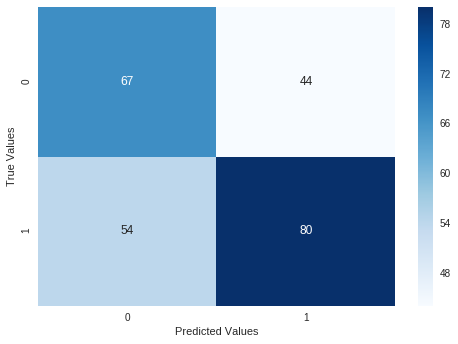

precision: [ 0.55371901  0.64516129]
recall: [ 0.6036036   0.59701493]
fscore: [ 0.57758621  0.62015504]
support: [111 134]


In [27]:
#Evaluation Metrics for Random Forest -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, rdpreds))
print(metrics.accuracy_score(y_test, rdpreds))
print(metrics.recall_score(y_test, rdpreds,average='macro'))
print(metrics.precision_score(y_test, rdpreds,average='macro'))
print(metrics.f1_score(y_test, rdpreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, rdpreds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, rdpreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Logistic Regression Algorithm

In [39]:
#Logistic Regression Model -- 2 labels
logrmodel = LogisticRegression(C=0.01)
logrmodel.fit(x_trains, y_train.values.ravel())
log_preds = logrmodel.predict(x_tests)
print(log_preds)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[ 1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1
  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1
  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1]


[[ 22  89]
 [ 33 101]]
0.502040816327
0.475964770741
0.465789473684
0.444258515544


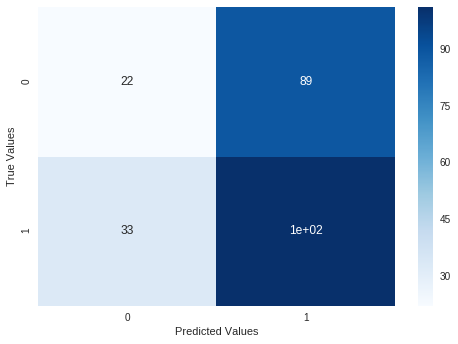

precision: [ 0.4         0.53157895]
recall: [ 0.1981982   0.75373134]
fscore: [ 0.26506024  0.62345679]
support: [111 134]


In [40]:
#Calculating test metrics to evaluate the model -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, log_preds))
print(metrics.accuracy_score(y_test, log_preds))
print(metrics.recall_score(y_test, log_preds,average='macro'))
print(metrics.precision_score(y_test, log_preds,average='macro'))
print(metrics.f1_score(y_test, log_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, log_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, log_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### K-Nearest Neighbors

In [41]:
#K=12 -- 2 labels
param_grid = {
    'n_neighbors': [1 , 100],
 'leaf_size': [10, 10000],
  'algorithm':['auto','ball_tree','kd_tree','brute'],
    'metric':['euclidean','manhattan','chebyshev']  
}
knn_mod = KNeighborsClassifier(n_neighbors = 16, algorithm = 'auto', leaf_size=1000, metric='manhattan',n_jobs=-1) 
knn_mod1 = GridSearchCV(knn_mod, param_grid)
knn_mod1.fit(x_trains, y_train.values.ravel())
knn_preds = knn_mod1.predict(x_tests)
print(knn_preds)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=1000, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 100], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'leaf_size': [10, 10000], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[-1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1
  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1
  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1
  1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1
 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1  1  1
  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1]


[[67 44]
 [62 72]]
0.567346938776
0.57045851822
0.570034750067
0.567166666667


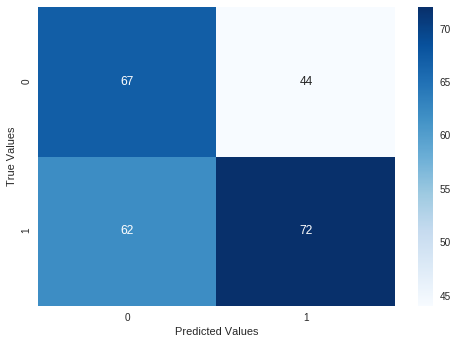

precision: [ 0.51937984  0.62068966]
recall: [ 0.6036036   0.53731343]
fscore: [ 0.55833333  0.576     ]
support: [111 134]


In [42]:
#Evaluation Metrics for KNN k=12 -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, knn_preds))
print(metrics.accuracy_score(y_test, knn_preds))
print(metrics.recall_score(y_test, knn_preds,average='macro'))
print(metrics.precision_score(y_test, knn_preds,average='macro'))
print(metrics.f1_score(y_test, knn_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, knn_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, knn_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Support Vector Machine Algorithm

In [34]:
#To be implemented

parameters = {'kernel':('linear', 'poly'), 'C':[1, 10]}
svm_mod = SVC(kernel = 'linear', C=1)
clf = svm_mod
clf = GridSearchCV(svm_mod, parameters)
clf.fit(x_trains, y_train.values.ravel())
svm_preds = clf.predict(x_tests)
print(svm_preds)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]


[[ 14  97]
 [ 15 119]]
0.542857142857
0.507092913809
0.516842273308
0.44


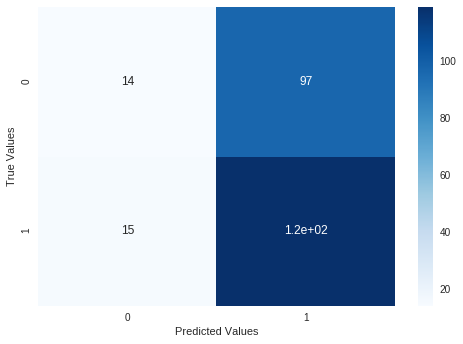

precision: [ 0.48275862  0.55092593]
recall: [ 0.12612613  0.8880597 ]
fscore: [ 0.2   0.68]
support: [111 134]


In [35]:
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, svm_preds))
print(metrics.accuracy_score(y_test, svm_preds))
print(metrics.recall_score(y_test, svm_preds,average='macro'))
print(metrics.precision_score(y_test, svm_preds,average='macro'))
print(metrics.f1_score(y_test, svm_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, svm_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, svm_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Neural Networks

In [36]:
import numpy as np

parameters = {'activation':['tanh', 'relu', 'logistic'], 'alpha':np.logspace(-5, 3, 5), 'hidden_layer_sizes':[(10,),(50,),(100,)],'solver':['sgd','adam'],'learning_rate':['constant','invscaling'],'learning_rate_init':[0.001,1]}
mlpmod = MLPClassifier(activation='tanh',solver='sgd',random_state=1)
clfmlp = GridSearchCV(mlpmod, parameters, cv=2)
clfmlp.fit(x_trains, y_train.values.ravel())
print(clfmlp.best_params_)
mlp_preds = clfmlp.predict(x_tests)
print(mlp_preds)

/home/cloudera/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


GridSearchCV(cv=2, error_score='raise',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['sgd', 'adam'], 'activation': ['tanh', 'relu', 'logistic'], 'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': array([  1.00000e-05,   1.00000e-03,   1.00000e-01,   1.00000e+01,
         1.00000e+03]), 'learning_rate': ['constant', 'invscaling'], 'learning_rate_init': [0.001, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'solver': 'sgd', 'activation': 'relu', 'hidden_layer_sizes': (100,), 'alpha': 1.0000000000000001e-05, 'learning_rate': 'constant', 'learning_rate_init': 1}
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1
  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1
  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]


[[ 20  91]
 [ 19 115]]
0.551020408163
0.519194567702
0.535536470002
0.471568627451


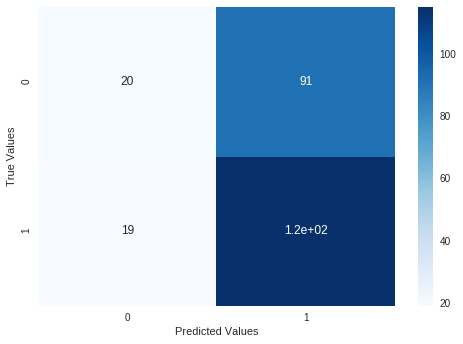

precision: [ 0.51282051  0.55825243]
recall: [ 0.18018018  0.85820896]
fscore: [ 0.26666667  0.67647059]
support: [111 134]


In [37]:
#Evaluation Metrics for MLP -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, mlp_preds))
print(metrics.accuracy_score(y_test, mlp_preds))
print(metrics.recall_score(y_test, mlp_preds,average='macro'))
print(metrics.precision_score(y_test, mlp_preds,average='macro'))
print(metrics.f1_score(y_test, mlp_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, mlp_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, mlp_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))